In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [4]:
def sumd_factor(df, window=30):
    """
    计算SUMD因子（总收益与总损失之间的差异比率）
    公式：(Sum(Greater(close-Ref(close, 1), 0), window) - 
          Sum(Greater(Ref(close, 1)-close, 0), window)) /
          (Sum(Abs(close-Ref(close, 1)), window) + 1e-12)
    
    参数:
    df: 包含OHLCV数据的DataFrame
    window: 滚动窗口大小 (默认10)
    """
    close = df['close']
    
    # 计算价格变化
    price_diff = close.diff()
    
    # 计算收益部分（价格上涨）
    gain = price_diff.where(price_diff > 0, 0)
    
    # 计算损失部分（价格下跌）
    loss = (-price_diff).where(price_diff < 0, 0)
    
    # 计算滚动窗口内的总收益
    sum_gain = gain.rolling(window).sum()
    
    # 计算滚动窗口内的总损失
    sum_loss = loss.rolling(window).sum()
    
    # 计算总绝对变化
    sum_abs = (sum_gain + sum_loss) + 1e-12
    
    # 计算SUMD因子
    factor = (sum_gain - sum_loss) / sum_abs
    
    return factor

# 因子测试

In [5]:
evaluator.set_factor(
    factor_func=sumd_factor,
    factor_name='sumd_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.014449
   Rank_IC (Spearman): -0.029643
📊 信息比率:
   IR: 0.183436
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130911
   因子列: sumd_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


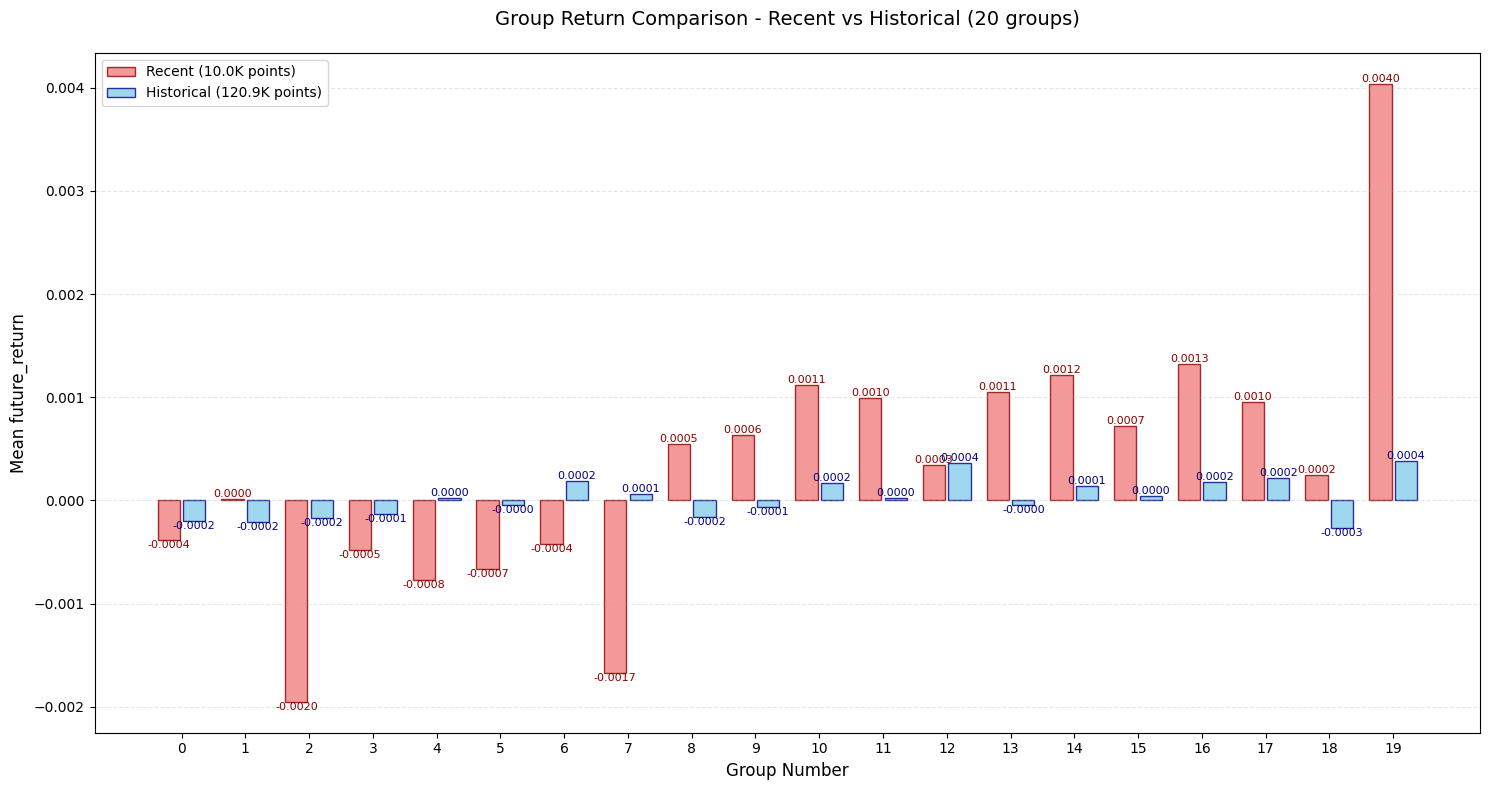

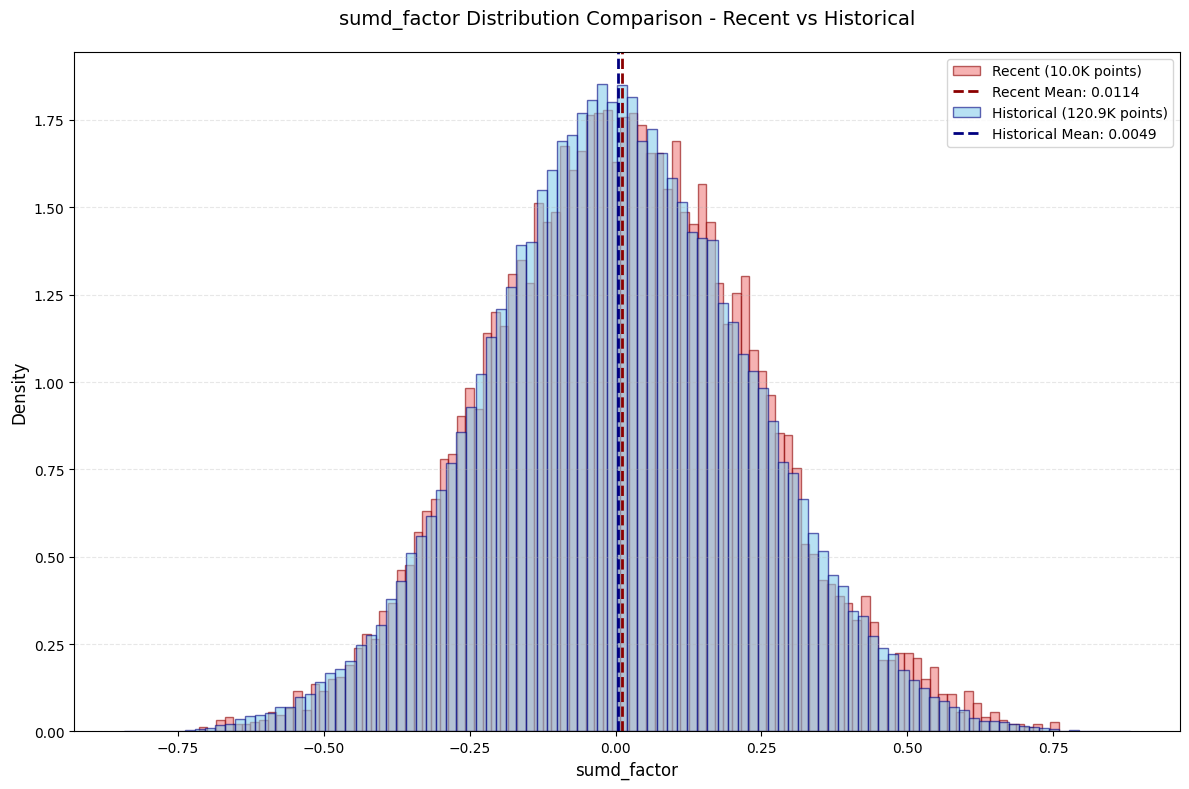

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)

In [7]:
print(result)

{'correlation_analysis': {'IC': 0.014449456000472847, 'Rank_IC': -0.029642809164598608}, 'information_ratio': {'IR': 0.18343627585893796, 'group_correlations': [-0.007694902360068484, 0.012274788262357145, -0.004963970083604782, -0.008107401377933232, 0.0030731640607735327, -0.0006117156370900873, -0.0033268770230315634, -0.009067911690362843, -2.0627509504644415e-05, 0.04828063347524532], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0      -0.8419  -0.3599   -0.4540      -0.0002      0.0151   6546
1      -0.3598  -0.2791   -0.3161      -0.0002      0.0134   6546
2      -0.2791  -0.2244   -0.2504      -0.0003      0.0133   6545
3      -0.2244  -0.1817   -0.2024      -0.0002      0.0122   6546
4      -0.1817  -0.1446   -0.1629      -0.0000      0.0119   6545
5      -0.1446  -0.1119   -0.1278      -0.0001      0.0114   6546
6      -0.1119  -0.0817   -0